<a href="https://colab.research.google.com/github/anamika1302/ML_algo_from_scratch/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In this notebook, we will be writing logitic regression code from scratch:
1. Load data from sklearn.datasets import make_classification, convert to asmatrix type and split.
2. Write Logistic Regression class:
###    Functions:
    a) compute_z
         - wT.X+b
    b) compute yhat
         - 1/1+e(-z)
    c) compute loss
        - y.T*np.log(y_hat) + (1-y).T*np.log(1-y_hat)
    d) compute gradient:
        - dL_dw = lr * np.dot(X.T,yhat-y)
        - dL_db = lr *np.sum((yhat -y).T)
    e) Update Weights and bias:
        - W = W - alpha * dL_dw
        - b = b - alpha * dL_db
    f) Predict function:
      use updated weight and bias to calculate z and y_hat

In [246]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import math

In [177]:
X,Y = make_classification(n_samples= 100, n_classes=2, n_features=4)
X = np.asmatrix(X)
Y = np.asmatrix(Y).T

In [178]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=1)
X_train.shape,Y_train.shape

((80, 4), (80, 1))

In [266]:

class Logistic_Regression:

    def __init__(self,epochs, learning_rate, alpha) -> None:
      self.n_epochs = epochs
      self.learning_rate =learning_rate
      self.alpha = alpha

    def compute_z(self,X_train, W, b):
      z = np.dot(X_train, W) +b
      return z

    def cal_y_hat(self,z):
      y_hat =1/(1 + np.exp(-z))
      return y_hat

    def log_loss(self,y_hat, y):
      loss = (-1/y.shape[0])*(y.T*(np.log(y_hat+1e-8))+(1-y).T*(np.log(1-y_hat+1e-8)))
      return loss.item()


    def calculate_gradient(self,y_hat,y,X_train):
      y_diff = y_hat-y
      dL_dw = self.learning_rate * np.dot(X_train.T,(y_diff))
      dL_db = self.learning_rate + np.sum((y_hat - y).T)
      return dL_dw,dL_db


    def fit(self,X_train, Y_train):
      n_samples, n_features = X_train.shape
      W = np.mat(np.zeros(X.shape[1])).T
      b = 0
      loss_history = []
      for i in range(self.n_epochs):
        z = self.compute_z(X_train, W, b)
        y_hat = self.cal_y_hat(z)
        print("Z: {}, X: {},W: {}, b:{}, Y {}, Y_hat {}, 1-Y_hat{}".format(z.shape, X_train.shape,W.shape,b, Y_train.shape,y_hat.shape, (1-y_hat).shape))
        loss = self.log_loss(y_hat, Y_train)
        dL_dw,dL_db = self.calculate_gradient(y_hat, Y_train, X_train)
        # print("row {} ,dL_dw.shape: {} ".format{i,dL_dw})
        W = W - self.alpha*dL_dw
        b = b -self.alpha * dL_db
        loss_history.append(loss)
      return W,b, loss_history


    def predict(self,W_updated,b_update,X_test):
      z_pred = self.compute_z(X_test,W_updated,b_update)
      y_pred = self.cal_y_hat(z_pred)
      y_pred[y_pred<=0.5] = 0
      y_pred[y_pred > 0.5] =1

      return y_pred








In [267]:
lr = Logistic_Regression(10, 0.01,0.1 )

In [268]:
W,b, loss_history = lr.fit(X_train, Y_train)

In [269]:
y_pred = lr.predict(W,b, X_test)
loss = lr.log_loss(y_pred, Y_test)
print(loss)

1.8420680653952368


Text(0, 0.5, 'Error')

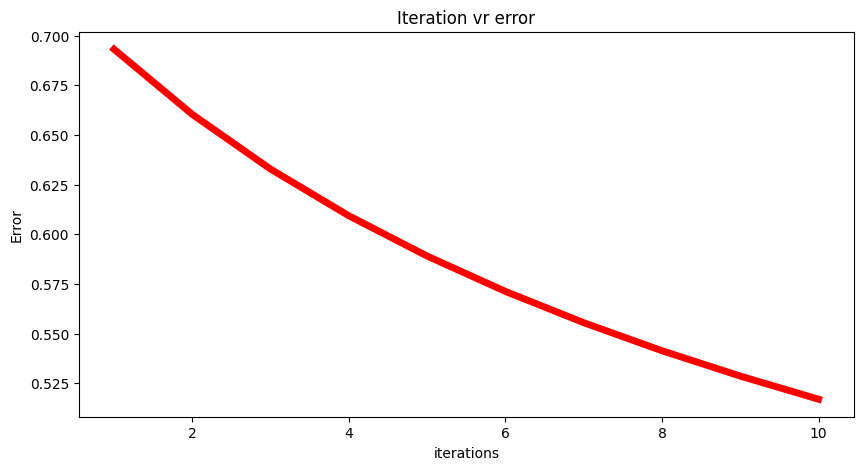

In [272]:
plt.figure(figsize=(10,5))
plt.plot(np.arange(1,len(loss_history)+1),loss_history,color='red',linewidth = 5)
plt.title("Iteration vr error")
plt.xlabel("iterations")
plt.ylabel("Error")